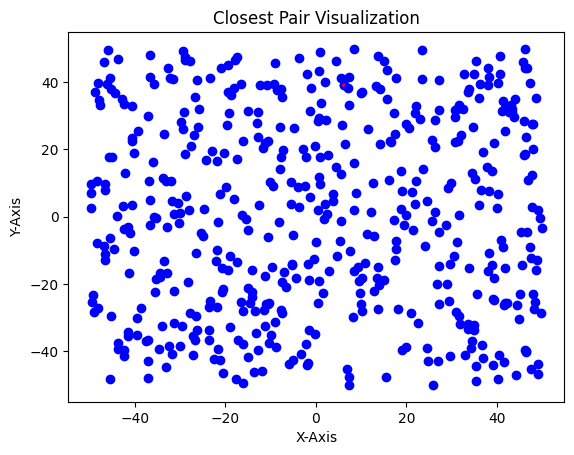

En Yakın Mesafe: 0.1414213562373109
En Yakın Noktalar: (6.1, 39.1) ve (6.2, 39.2)


In [5]:
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def calculate_distance(point_1, point_2):
    return math.sqrt((point_1.x - point_2.x)**2 + (point_1.y - point_2.y)**2)

def read_points(Path):
    points = []
    with open(Path, 'r') as file:
        for line in file:
            x, y = map(float, line.strip().split())
            points.append(Point(x, y))
    return points

def closest_pair(points, All_data):
    if len(points) <= 1:
        return float('inf'), None
    elif len(points) == 2:
        distance_ = calculate_distance(points[0], points[1])
        return distance_, (points[0], points[1])
    elif len(points) == 3:
        distance_1 = calculate_distance(points[0], points[1])
        distance_2 = calculate_distance(points[1], points[2])
        distance_3 = calculate_distance(points[0], points[2])
        min_dist = min(distance_1, distance_2, distance_3)
        if min_dist == distance_1:
            return distance_1, (points[0], points[1])
        elif min_dist == distance_2:
            return distance_2, (points[1], points[2])
        else:
            return distance_3, (points[0], points[2])

    mid = len(points) // 2
    left = points[:mid]
    right = points[mid:]
    mid_x = points[mid].x
    All_data.append(("D", mid_x, None))
    M_L = closest_pair(left, All_data)
    All_data.append(("L", M_L[1], M_L[0]))
    M_R = closest_pair(right, All_data)
    All_data.append(("R", M_R[1], M_R[0]))
    min_strip = merge_and_check(points, mid, min(M_L[0], M_R[0]), All_data)
    All_points = [M_L, M_R, min_strip]
    final_ = min(All_points, key=lambda x: x[0])
    All_data.append(("F", final_[1], final_[0]))
    return final_

def merge_and_check(points, mid, min_distance, All_data):
    strip = []
    for point in points:
        if abs(point.x - points[mid].x) < min_distance:
            strip.append(point)

    for c3 in range(len(strip) - 1):
        for c4 in range(len(strip) - c3 - 1):
            if strip[c4].y > strip[c4 + 1].y:
                strip[c4], strip[c4 + 1] = strip[c4 + 1], strip[c4]

    min_pair = None
    All_data.append(("S", strip, None))
    for c3 in range(len(strip)):
        for c4 in range(c3 + 1, len(strip)):
            if strip[c4].y - strip[c3].y >= min_distance:
                break
            distance_ = calculate_distance(strip[c3], strip[c4])
            if distance_ < min_distance:
                min_distance = distance_
                min_pair = (strip[c3], strip[c4])
                All_data.append(("C", min_pair, distance_))
    return min_distance, min_pair

def visualize(points, All_data, closest_pair_result):
    fig, ax = plt.subplots()
    ax.set_xlim(min(p.x for p in points) - 10, max(p.x for p in points) + 10)
    ax.set_ylim(min(p.y for p in points) - 10, max(p.y for p in points) + 10)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.title('Closest Pair Visualization (Step-by-step)')
    for c1 in points:
        ax.plot(c1.x, c1.y, 'bo')
    division_line, = ax.plot([], [], 'g-', linewidth=2)
    strip_points, = ax.plot([], [], 'go', markersize=8)
    closest_line, = ax.plot([], [], 'r-', linewidth=3)
    current_closest_line, = ax.plot([], [], 'b--', linewidth=2)
    temp_lines = []
    current_closest = (float('inf'), None)
    def update(frame):
        nonlocal temp_lines, current_closest
        step = All_data[frame]
        for c2 in temp_lines:
            c2.remove()
        temp_lines = []
        if step[0] == "D":
            division_line.set_data([step[1], step[1]], [ax.get_ylim()[0], ax.get_ylim()[1]])
        elif step[0] == "S":
            strip_x = [p.x for p in step[1]]
            strip_y = [p.y for p in step[1]]
            strip_points.set_data(strip_x, strip_y)
        elif step[0] in ["L", "R", "F"]:
            if step[1]:
                p1, p2 = step[1]
                temp_lines.append(ax.plot([p1.x, p2.x], [p1.y, p2.y], 'm-' if step[0] != "F" else 'r-',
                                          linewidth=2)[0])
        elif step[0] == "C":
            p1, p2 = step[1]
            temp_lines.append(ax.plot([p1.x, p2.x], [p1.y, p2.y], 'c-', linewidth=2)[0])
        if step[2] and step[2] < current_closest[0]:
            current_closest = (step[2], step[1])
        if current_closest[1]:
            p1, p2 = current_closest[1]
            current_closest_line.set_data([p1.x, p2.x], [p1.y, p2.y])
        return division_line, strip_points, closest_line, current_closest_line, *temp_lines
    ani = FuncAnimation(fig, update, frames=len(All_data), interval=0, repeat=False)
    plt.show()

Path = 'C:/Users/90553/Desktop/algoritma ödevi/points_.txt'
points = read_points(Path)
points.sort(key=lambda p: p.x)
All_data = []
result = closest_pair(points, All_data)
visualize(points, All_data, result)
print(f"Closest Distance: {result[0]}")
if result[1]:
    print(f"Closest Points: ({result[1][0].x}, {result[1][0].y}) and ({result[1][1].x}, {result[1][1].y})")
else:
    print("No pairs found.")
